## BnB DFS ##

In [227]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt

# pg 182

def DFS(dist_mat, start):
    
    def NN(state):

        dist_mat_tilde = dist_mat
        cost = 0
        next = state[-1]
        iter = 0

        while iter <= len(dist_mat) - len(state):

            ind = dist_mat_tilde.replace(0,10**9).to_numpy()[next,:].argmin()
            cost_new = dist_mat_tilde.replace(0,10**9).to_numpy()[ind,:].argmin()
            cost += cost_new
            next = ind
            iter += 1

        return cost + dist_mat.loc[next,state[0]]
        
    def objective_function(state):
        
        # nearest neighbors heuristic
        h = NN(state)
        
        if len(state) <= 2:
            return U
        
        cost = h

        for i in range(len(state) - 2):
            cost += dist_mat.loc[state[i], state[i+1]]
        cost += dist_mat.loc[state[-2],state[-1]]

        # add zero onto the end
        if len(state) == len(dist_mat):
            cost += dist_mat.loc[state[-1], 0]
            cost -= h # since this will be the best distance
        return cost
    
    # appends newly generated nodes to frontier
    def gen_front(current, frontier, N):

        nums = [i for i in range(N)]
        
        for y in current:
            if y in nums:
                nums.remove(y)
        for i in range(len(nums)):
            t = current[:]
            t.append(nums[i])
            frontier.append(t)
        return frontier
    
    cost_array = []
    best_path = []
    best_dist = 0
    
    frontier = [start]    
    N = len(dist_mat)
    U = 10**9 # initial bound 
    
    while frontier != []:
        new_path = frontier.pop()
        path_cost = objective_function(new_path)
        
        if path_cost > U:
            continue
            
        # we have a complete path    
        elif len(new_path) == N:
            U = path_cost
            best_path = new_path
            best_dist = path_cost
            cost_array.append(path_cost)
            
        else:
            frontier = gen_front(new_path, frontier, N)
            
    plt.plot(cost_array)
    plt.title('Progression path cost')
    plt.ylabel('Cost')
    plt.xlabel('Iteration')
    
    return best_path, best_dist       

,0,1,2,3,4,5,6,7
0,0.0,104.0,104.0,113.0,82.0,96.0,105.0,106.0
1,104.0,0.0,97.0,106.0,98.0,90.0,114.0,91.0
2,104.0,97.0,0.0,112.0,83.0,92.0,100.0,81.0
3,113.0,106.0,112.0,0.0,99.0,88.0,107.0,99.0
4,82.0,98.0,83.0,99.0,0.0,97.0,110.0,92.0
5,96.0,90.0,92.0,88.0,97.0,0.0,86.0,95.0
6,105.0,114.0,100.0,107.0,110.0,86.0,0.0,111.0
7,106.0,91.0,81.0,99.0,92.0,95.0,111.0,0.0


([0, 4, 2, 7, 1, 3, 5, 6], 722.0)

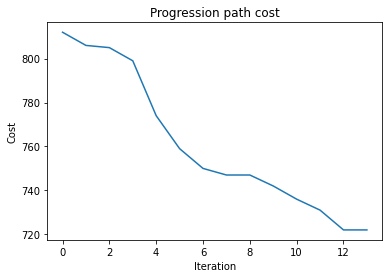

In [237]:
import numpy as np
import pandas as pd

def write_distance_matrix(n, mean, sigma):
    distance_matrix = np.zeros((n, n))
    random_distance = []
    num_distance = int(n * (n-1) / 2)
    for _ in range(num_distance):
        distance = 0
        while distance <= 0:
            distance = np.random.normal(mean, sigma)

        random_distance.append(round(distance))
    
    iu = np.triu_indices(n, 1)
    distance_matrix[iu] = random_distance
    distance_matrix += distance_matrix.T

    return distance_matrix
    

mean = 100
sigma = 10
N = 8
start = [0]
distance_matrix = pd.DataFrame(write_distance_matrix(N, mean, sigma))
display(distance_matrix)

DFS(distance_matrix, start)